In [1]:
### Import necessary libraries

# For Dataset Handling
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler, SMOTE

#For model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import ensemble

#For Metrics evaluation
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

#For plotting
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import export_graphviz
import graphviz

In [2]:
### Read the dataset
df = pd.read_csv("train.csv")

# adjust these settings to display all columns
pd.set_option('display.max_columns', None)
# Display the first 10 rows
df.head(10)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.60,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.60,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.60,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.80,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.00,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0
5,ID00006,1.018709,0.07,0.519231,C6,13051,3,C2,M4,Diesel,250Nm@2750rpm,113.45bhp@4000rpm,1.5 L U2 CRDi,6,Yes,Yes,Yes,Yes,Yes,Disc,1493,4,Automatic,6,Power,5.20,4300,1790,1635,1720,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
6,ID00007,0.097992,0.16,0.403846,C7,6112,4,B2,M5,Diesel,200Nm@3000rpm,88.77bhp@4000rpm,1.5 Turbocharged Revotorq,2,No,Yes,No,Yes,No,Drum,1497,4,Manual,5,Electric,5.00,3990,1755,1523,1490,No,No,No,No,No,Yes,Yes,Yes,No,No,Yes,Yes,5,0
7,ID00008,0.509085,0.14,0.423077,C8,8794,1,B2,M6,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,K Series Dual jet,2,No,Yes,No,Yes,No,Drum,1197,4,Manual,5,Electric,4.80,3845,1735,1530,1335,Yes,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
8,ID00009,0.282394,0.07,0.298077,C7,6112,3,C2,M4,Diesel,250Nm@2750rpm,113.45bhp@4000rpm,1.5 L U2 CRDi,6,Yes,Yes,Yes,Yes,Yes,Disc,1493,4,Automatic,6,Power,5.20,4300,1790,1635,1720,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
9,ID00010,0.566255,0.04,0.442308,C9,17804,1,B2,M7,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K Series Engine,6,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.85,3990,1745,1500,1410,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,0,0


In [3]:
# Check for missing values
df.info(verbose = True) # result in none

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

In [4]:
df.duplicated().sum() # result in 0

0

In [5]:
# Checking the unique values in the categorial features
for col in df.select_dtypes("O"):    
    print(df[col].nunique())
    print(df[col].value_counts())
    print('========================================')

58592
policy_id
ID00001    1
ID39053    1
ID39055    1
ID39056    1
ID39057    1
          ..
ID19535    1
ID19536    1
ID19537    1
ID19538    1
ID58592    1
Name: count, Length: 58592, dtype: int64
22
area_cluster
C8     13654
C2      7342
C5      6979
C3      6101
C14     3660
C13     3423
C10     3155
C9      2734
C7      2167
C12     1589
C1      1468
C11     1212
C19      952
C6       890
C15      771
C4       665
C17      492
C16      401
C21      379
C18      242
C22      207
C20      109
Name: count, dtype: int64
6
segment
B2         18314
A          17321
C2         14018
B1          4173
C1          3557
Utility     1209
Name: count, dtype: int64
11
model
M1     14948
M4     14018
M6     13776
M8      4173
M7      2940
M3      2373
M9      2114
M5      1598
M10     1209
M2      1080
M11      363
Name: count, dtype: int64
3
fuel_type
Petrol    20532
CNG       20330
Diesel    17730
Name: count, dtype: int64
9
max_torque
113Nm@4400rpm     17796
60Nm@3500rpm      14948
250Nm@275

In [6]:
# Checking the statistical summary of the dataset
df.describe()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating,is_claim
count,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.00000,58592.000000,58592.000000,58592.000000
mean,0.611246,0.069424,0.469420,18826.858667,1.763722,3.137066,1162.355851,3.626963,5.245443,4.852893,3850.476891,1672.233667,1553.33537,1385.276813,1.759950,0.063968
std,0.414156,0.056721,0.122886,17660.174792,1.136988,1.832641,266.304786,0.483616,0.430353,0.228061,311.457119,112.089135,79.62227,212.423085,1.389576,0.244698
min,0.002735,0.000000,0.288462,290.000000,1.000000,1.000000,796.000000,3.000000,5.000000,4.500000,3445.000000,1475.000000,1475.00000,1051.000000,0.000000,0.000000
25%,0.210250,0.020000,0.365385,6112.000000,1.000000,2.000000,796.000000,3.000000,5.000000,4.600000,3445.000000,1515.000000,1475.00000,1185.000000,0.000000,0.000000
50%,0.573792,0.060000,0.451923,8794.000000,1.000000,2.000000,1197.000000,4.000000,5.000000,4.800000,3845.000000,1735.000000,1530.00000,1335.000000,2.000000,0.000000
75%,1.039104,0.110000,0.548077,27003.000000,3.000000,6.000000,1493.000000,4.000000,5.000000,5.000000,3995.000000,1755.000000,1635.00000,1510.000000,3.000000,0.000000
max,1.396641,1.000000,1.000000,73430.000000,5.000000,6.000000,1498.000000,4.000000,6.000000,5.200000,4300.000000,1811.000000,1825.00000,1720.000000,5.000000,1.000000


In [7]:
# Checking the categorical summary of the dataset
df.describe(include = "O")

,policy_id,area_cluster,segment,model,fuel_type,max_torque,max_power,engine_type,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,transmission_type,steering_type,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert
count,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592
unique,58592,22,6,11,3,9,9,11,2,2,2,2,2,2,2,3,2,2,2,2,2,2,2,2,2,2,2,2
top,ID00001,C8,B2,M1,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,F8D Petrol Engine,No,Yes,No,Yes,No,Drum,Manual,Power,Yes,No,No,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes
freq,1,13654,18314,14948,20532,17796,17796,14948,40191,35526,44574,56219,35704,44574,38181,33502,33928,41634,41634,38077,32177,42435,42435,57383,34291,36309,42435,58229


In [8]:
### Pre-process the data

# List boolean columns
is_cols=[col for col in df.columns if col.startswith("is") and col!="is_claim"]
print(is_cols)

# Encoding all the boolean data into numerical values 
df = df.replace({ "No" : 0 , "Yes" : 1 })

['is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 'is_parking_camera', 'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks', 'is_central_locking', 'is_power_steering', 'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror', 'is_ecw', 'is_speed_alert']


In [9]:
df.info(verbose = True) # check the data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

In [10]:
#Removal policy_id column from the original DataFrame
df.drop(columns = "policy_id", inplace = True)

# List colomns for which dummy variables were created
categorical_cols = df.select_dtypes(include=['object']).columns
print(categorical_cols)

# Dummy encoding categorical variables
df= pd.get_dummies(df, columns=categorical_cols,drop_first=True)

Index(['area_cluster', 'segment', 'model', 'fuel_type', 'max_torque',
       'max_power', 'engine_type', 'rear_brakes_type', 'transmission_type',
       'steering_type'],
      dtype='object')


In [11]:
df.info(verbose = True) # check the data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 101 columns):
 #    Column                                 Dtype  
---   ------                                 -----  
 0    policy_tenure                          float64
 1    age_of_car                             float64
 2    age_of_policyholder                    float64
 3    population_density                     int64  
 4    make                                   int64  
 5    airbags                                int64  
 6    is_esc                                 int64  
 7    is_adjustable_steering                 int64  
 8    is_tpms                                int64  
 9    is_parking_sensors                     int64  
 10   is_parking_camera                      int64  
 11   displacement                           int64  
 12   cylinder                               int64  
 13   gear_box                               int64  
 14   turning_radius                      

In [12]:
# Checking the correlation among the numerical features
df.corr()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,area_cluster_C10,area_cluster_C11,area_cluster_C12,area_cluster_C13,area_cluster_C14,area_cluster_C15,area_cluster_C16,area_cluster_C17,area_cluster_C18,area_cluster_C19,area_cluster_C2,area_cluster_C20,area_cluster_C21,area_cluster_C22,area_cluster_C3,area_cluster_C4,area_cluster_C5,area_cluster_C6,area_cluster_C7,area_cluster_C8,area_cluster_C9,segment_B1,segment_B2,segment_C1,segment_C2,segment_Utility,model_M10,model_M11,model_M2,model_M3,model_M4,model_M5,model_M6,model_M7,model_M8,model_M9,fuel_type_Diesel,fuel_type_Petrol,max_torque_170Nm@4000rpm,max_torque_200Nm@1750rpm,max_torque_200Nm@3000rpm,max_torque_250Nm@2750rpm,max_torque_60Nm@3500rpm,max_torque_82.1Nm@3400rpm,max_torque_85Nm@3000rpm,max_torque_91Nm@4250rpm,max_power_118.36bhp@5500rpm,max_power_40.36bhp@6000rpm,max_power_55.92bhp@5300rpm,max_power_61.68bhp@6000rpm,max_power_67.06bhp@5500rpm,max_power_88.50bhp@6000rpm,max_power_88.77bhp@4000rpm,max_power_97.89bhp@3600rpm,engine_type_1.2 L K Series Engine,engine_type_1.2 L K12N Dualjet,engine_type_1.5 L U2 CRDi,engine_type_1.5 Turbocharged Revotorq,engine_type_1.5 Turbocharged Revotron,engine_type_F8D Petrol Engine,engine_type_G12B,engine_type_K Series Dual jet,engine_type_K10C,engine_type_i-DTEC,rear_brakes_type_Drum,transmission_type_Manual,steering_type_Manual,steering_type_Power
policy_tenure,1.000000,0.166312,0.143676,-0.100307,0.086101,0.103981,0.105427,0.192941,0.094240,-0.016007,0.111614,0.194361,0.191185,0.095305,0.166426,0.190869,0.213228,0.119055,0.141027,0.189288,0.104055,0.104055,0.107545,0.184687,0.229307,0.229307,0.012695,0.191328,0.116186,0.229307,-0.010318,0.173280,0.078747,-0.082296,0.043507,0.028701,0.028617,0.092209,-0.052624,-0.023716,-0.019911,-0.026725,0.034714,-0.001104,-0.012573,0.000687,0.005959,-0.094329,-0.025108,-0.079354,-0.014721,-0.056870,0.174079,-0.042181,0.016512,0.109498,0.017218,0.094240,-0.012695,-0.012695,0.010318,0.006948,0.016007,0.094240,0.004974,0.101311,0.031989,0.016512,0.012694,0.094437,0.114957,0.010318,0.012694,0.004974,0.094240,-0.230935,0.016512,-0.012695,0.016007,0.010318,-0.230935,0.016512,-0.012695,0.016007,0.110643,0.004974,0.012694,0.031989,0.006948,0.094240,0.004974,0.010318,-0.230935,-0.012695,0.101311,0.016512,0.012694,-0.094240,-0.107626,-0.012695,-0.111979
age_of_car,0.166312,1.000000,-0.035427,-0.062255,0.188122,0.209073,0.225892,0.370190,0.194777,-0.023809,0.228212,0.393208,0.379522,0.201579,0.332716,0.383177,0.414104,0.259156,0.302127,0.349570,0.212699,0.212699,0.223579,0.350568,0.435211,0.435211,-0.018853,0.357716,0.194007,0.435211,-0.046551,0.348853,-0.028172,-0.039942,-0.005521,0.038913,0.044894,0.039850,-0.009415,-0.039778,-0.033953,-0.037443,0.001592,0.004800,-0.011362,0.005061,-0.007053,-0.131191,-0.023909,-0.064392,-0.026784,-0.029195,0.188086,-0.029524,0.020550,0.196803,0.042679,0.194777,0.018853,0.018853,0.046551,0.035194,0.023809,0.194777,0.050805,0.164098,0.061203,0.020550,0.009678,0.202830,0.201279,0.046551,0.009678,0.050805,0.194777,-0.452306,0.020550,0.018853,0.023809,0.046551,-0.452306,0.020550,0.018853,0.023809,0.190674,0.050805,0.009678,0.061203,0.035194,0.194777,0.050805,0.046551,-0.452306,0.018853,0.164098,0.020550,0.009678,-0.194777,-0.222238,0.018853,-0.212478
age_of_policyholder,0.143676,-0.035427,1.000000,0.009669,-0.031989,-0.008041,-0.014844,0.011201,-0.002840,0.026347,-0.039199,-0.023764,0.004183,-0.003115,-0.016764,-0.020138,-0.006135,-0.053930,-0.007758,0.011219,-0.010025,-0.010025,-0.029205,0.025025,-0.038864,-0.038864,0.024265,0.0109

In [13]:
### Create input data (X) and output data (y)
X = df.drop(['is_claim'], axis=1)  # Features
y = df['is_claim']  # Target variable

# Checking whether the data is balanced 
y.value_counts() # result in minority_class/majority_class≈0.068

is_claim
0    54844
1     3748
Name: count, dtype: int64

In [14]:
# The data is highly imbalanced, so perform SMOTE with a specific ratio 
# to avoid either oversampling excessively or a classifier predicts only the majority class
X, y = SMOTE(sampling_strategy=0.75, random_state=42).fit_resample(X, y)

# Inspect the distribution
y.value_counts()

is_claim
0    54844
1    41133
Name: count, dtype: int64

In [15]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=83)

# Create an instance of the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data and transform the numerical features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
def classification_model(MODEL, X_train, X_test, y_train, y_test, model_name=""):
    # Initialize the model
    model = MODEL
    
    # Train the model on the training set
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    # Print the results
    print(f"Model: {model_name}")
    print("Confusion Matrix:\n", confusion)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print()
    
    # Plot the confusion matrix heatmap
    sns.heatmap(confusion, annot=True)
    plt.show()
    
    # Visualize the Decision Tree
    if model_name == "DecisionTreeClassifier":
        dot_data = export_graphviz(
            model,
            out_file=None,
            feature_names=list(X.columns),
            class_names=list(map(str, df['is_claim'].unique())),  # Convert to strings
            filled=True,
            rounded=True
        )

        graph = graphviz.Source(dot_data)
        graph.render(filename='decision_tree', format='png')


Model: LogisticRegression
Confusion Matrix:
 [[8580 2411]
 [5214 2991]]
Accuracy: 0.6027818295478224
Precision: 0.5536838208071084
Recall: 0.36453382084095065



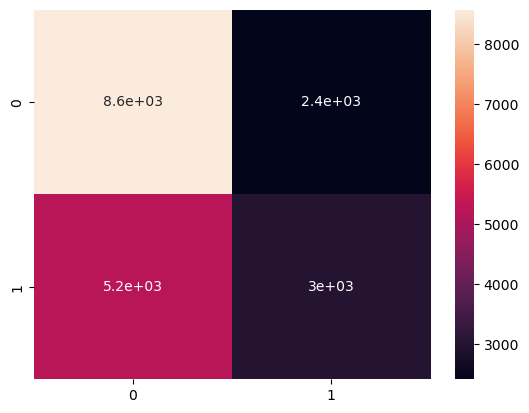

Model: DecisionTreeClassifier
Confusion Matrix:
 [[5446 5545]
 [1502 6703]]
Accuracy: 0.6328922692227548
Precision: 0.547273024167211
Recall: 0.8169408897014016



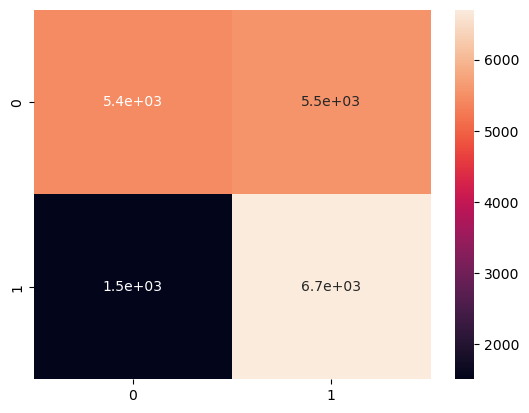

Model: RandomForestClassifier
Confusion Matrix:
 [[10123   868]
 [ 1050  7155]]
Accuracy: 0.9000833506980621
Precision: 0.8918110432506544
Recall: 0.8720292504570384



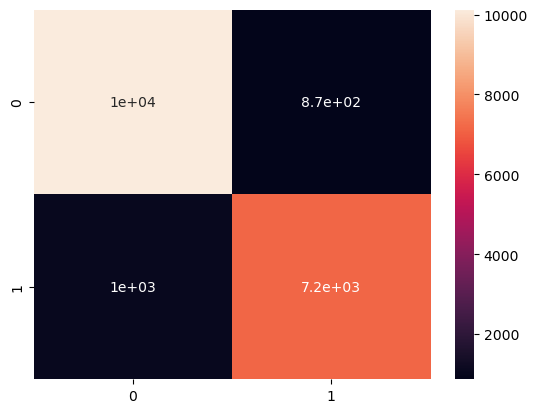

In [17]:
classification_model(LogisticRegression(max_iter=1000), X_train_scaled, X_test_scaled, y_train, y_test,"LogisticRegression")

classification_model(DecisionTreeClassifier(max_depth=4, random_state=0, criterion='gini'), X_train_scaled, X_test_scaled, y_train, y_test,"DecisionTreeClassifier")

classification_model(RandomForestClassifier(), X_train_scaled, X_test_scaled, y_train, y_test,"RandomForestClassifier")
